# LOPF using the zonal network

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a future 3 day period.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
# write csv files for import
start = '2050-06-04 00:00:00'
end = '2050-06-06 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 1.

Choose from one of the National Grid Future Energy Scenarios.

In [4]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'

Choose a baseline year (from 2010-2020). The baseline year determines which historical load profile and weather dataset is used for the future year modelled. The National Grid FES modellers used 2012 as their baseline year.

In [5]:
year_baseline = 2012

Here we modify the network argument to choose the zonal model.

In [6]:
networkmodel = 'Zonal'

In [7]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, networkmodel=networkmodel, P2G=False,
                               marine_modify=True, marine_scenario='Mid')

C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To act

In [8]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')
# network.import_from_csv_folder('UC_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
       'Fai-Hea', 'Hol', 'NE-Jer', 'Nor-Ron-Fir', 'Pen-Fir-Dee', 'Pen-Fir-Sha',
       'Rai-Isl', 'Ram-Isl', 'Sou-Jer', 'Sou-Min-Jer', 'Str-Lou', 'Tor-Hea',
       'Wes-Ang-Dem-Mor', 'Wes-Cas', 'Wes-Fir'],
      dtype='object', name='Generator') for attribute p_max_pu of Generator are not in main components dataframe generators
INFO:pypsa.io:Imported network LOPF_data has buses, generators, links, loads, storage_units


Lines need to be scaled up to accomadate for future generation, and specific analysis will be done on this in a later notebook.
Note: interconnects are links in future, so don't need to be selective here (as was required in historical simulation).

In [9]:
contingency_factor = 4
network.links.p_nom *= contingency_factor

In [10]:
network.consistency_check()

Index(['Bar-Bri-Cha', 'Big Rus', 'Bri-Cha-Min', 'Eas-Cas', 'Eas-Rai-Sou',
       'Fai-Hea', 'Hol', 'NE-Jer', 'Nor-Ron-Fir', 'Pen-Fir-Dee', 'Pen-Fir-Sha',
       'Rai-Isl', 'Ram-Isl', 'Sou-Jer', 'Sou-Min-Jer', 'Str-Lou', 'Tor-Hea',
       'Wes-Ang-Dem-Mor', 'Wes-Cas', 'Wes-Fir'],
      dtype='object', name='Generator')
Index(['build_year'], dtype='object', name='attribute')
They are:
attribute
build_year    int64
dtype: object
but should be:
attribute
build_year    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       int32
up_time_before      int32
down_time_before    int32
Name: dtype, dtype: object
Index(['build

In [11]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 2.51s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-19
Read LP format model from file C:\Users\alyden\AppData\Local\Temp\pypsa-problem-n301qtv0.lp
Reading time = 1.76 seconds
obj: 743456 rows, 193969 columns, 1296480 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 743456 rows, 193969 columns and 1296480 nonzeros
Model fingerprint: 0xa0e2a1b6
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-05, 1e+09]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 736982 rows and 170999 columns
Presolve time: 0.51s
Presolved: 6474 rows, 23396 columns, 40240 nonzeros

Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 1.266e+04
 Factor NZ  : 1.784e+05 (roughly 13 MB of memory)
 Factor Ops : 1.015e+07 (les

INFO:pypsa.linopf:Optimization successful. Objective value: 1.46e+07


('ok', 'optimal')

## Running the optimisation

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [21]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

if networkmodel == 'Zonal':
    boundary = pd.read_csv('../data/network/ZonesBasedGBsystem/network/links.csv')['name'].tolist()
    print(network.links_t.p0)
    imp = network.links_t.p0.copy().drop(columns=boundary)
    imp[imp < 0] = 0
    imp['Interconnectors Import'] = imp.sum(axis=1)
    interconnector_import = imp[['Interconnectors Import']]
    print(interconnector_import)

    p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

    exp = network.links_t.p0.copy().drop(columns=boundary)
    exp[exp > 0] = 0
    exp['Interconnectors Export'] = exp.sum(axis=1)
    interconnector_export = exp[['Interconnectors Export']]
    print(interconnector_export)

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

Link                 BritNed  EastWest  Moyle  Nemo      IFA         IFA2  \
snapshot                                                                    
2050-06-04 00:00:00      0.0       0.0    0.0   0.0   2720.0 -3649.480891   
2050-06-04 01:00:00      0.0       0.0    0.0   0.0 -13600.0  3805.151335   
2050-06-04 02:00:00      0.0       0.0    0.0   0.0  13600.0 -3288.061000   
2050-06-04 03:00:00      0.0       0.0    0.0   0.0  13600.0  3401.463174   
2050-06-04 04:00:00      0.0       0.0    0.0   0.0 -13600.0 -2591.608768   
...                      ...       ...    ...   ...      ...          ...   
2050-06-06 19:00:00      0.0       0.0    0.0   0.0  13600.0 -4764.369742   
2050-06-06 20:00:00      0.0       0.0    0.0   0.0  13600.0 -4620.688739   
2050-06-06 21:00:00      0.0       0.0    0.0   0.0  -2720.0 -4284.710973   
2050-06-06 22:00:00      0.0       0.0    0.0   0.0 -13600.0 -3510.588029   
2050-06-06 23:00:00      0.0       0.0    0.0   0.0  13600.0 -2778.583638   

,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Waste,Wave power,Wind Offshore,Wind Onshore,Battery,Compressed Air,Liquid Air,Pumped Storage Hydroelectric,Interconnectors Import,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2050-06-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,61.883955,0.0,1055.599979,0.0,...,0.0,575.510670,31427.406879,6657.371667,9356.505663,142.908592,304.027646,262.080555,17348.999145,0.0
2050-06-04 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,58.076515,0.0,1299.199980,0.0,...,0.0,557.459933,28010.878861,4142.382808,4962.994215,0.000000,94.324588,1579.459459,26925.151335,0.0
2050-06-04 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,58.330844,0.0,1542.799981,0.0,...,0.0,552.246670,32073.471793,5252.382014,0.000000,0.000000,0.000000,0.000000,26408.061000,0.0
2050-06-04 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,57.377113,0.0,1786.399982,0.0,...,0.0,506.174040,31219.280329,3980.236390,2741.721871,0.000000,73.270704,1579.459459,23808.965486,0.0
2050-06-04 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,58.903271,0.0,2029.999983,0.0,...,0.0,395.129020,34749.866457,4607.345005,2243.132967,428.725777,159.920972,231.978119,22331.947395,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-06-06 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,310.420790,0.0,0.000000,0.0,...,0.0,234.952690,47230.335027,5206.003600,972.723393,300.165000,0.000000,5136.261826,27884.369742,0.0
2050-06-06 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,185.929462,0.0,0.000000,0.0,...,0.0,234.952690,50101.792556,3574.859783,7140.583234,300.165000,954.190704,1579.459459,27740.688739,0.0
2050-06-06 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,191.563690,0.0,0.000000,0.0,...,0.0,362.405320,43640.686032,4624.516556,6711.395114,2058.111553,880.920000,4258.741379,22802.192955,0.0


Graph the power output of the different generation types...

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


Text(0.5, 0, '')

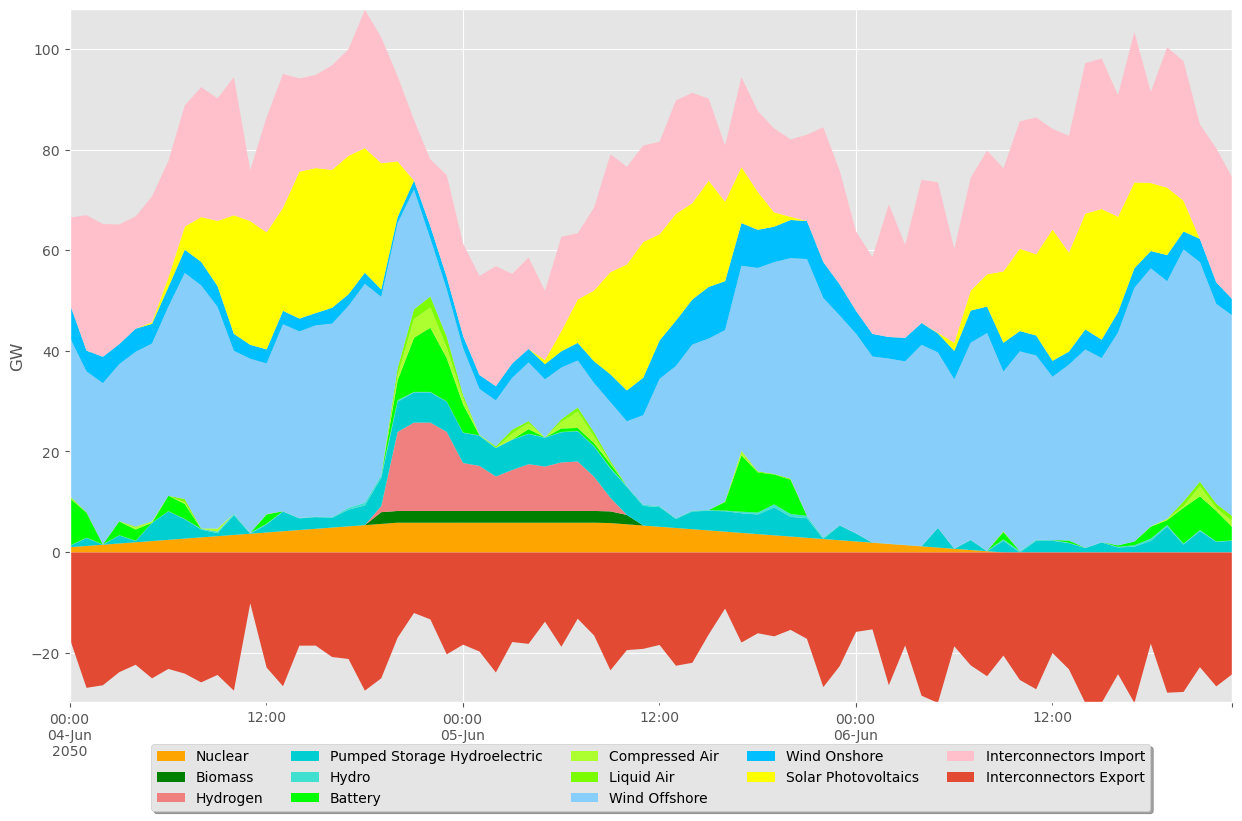

In [22]:
cols = ["Nuclear", 'Biomass',
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics', 
        'Unmet Load', 'Interconnectors Import'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

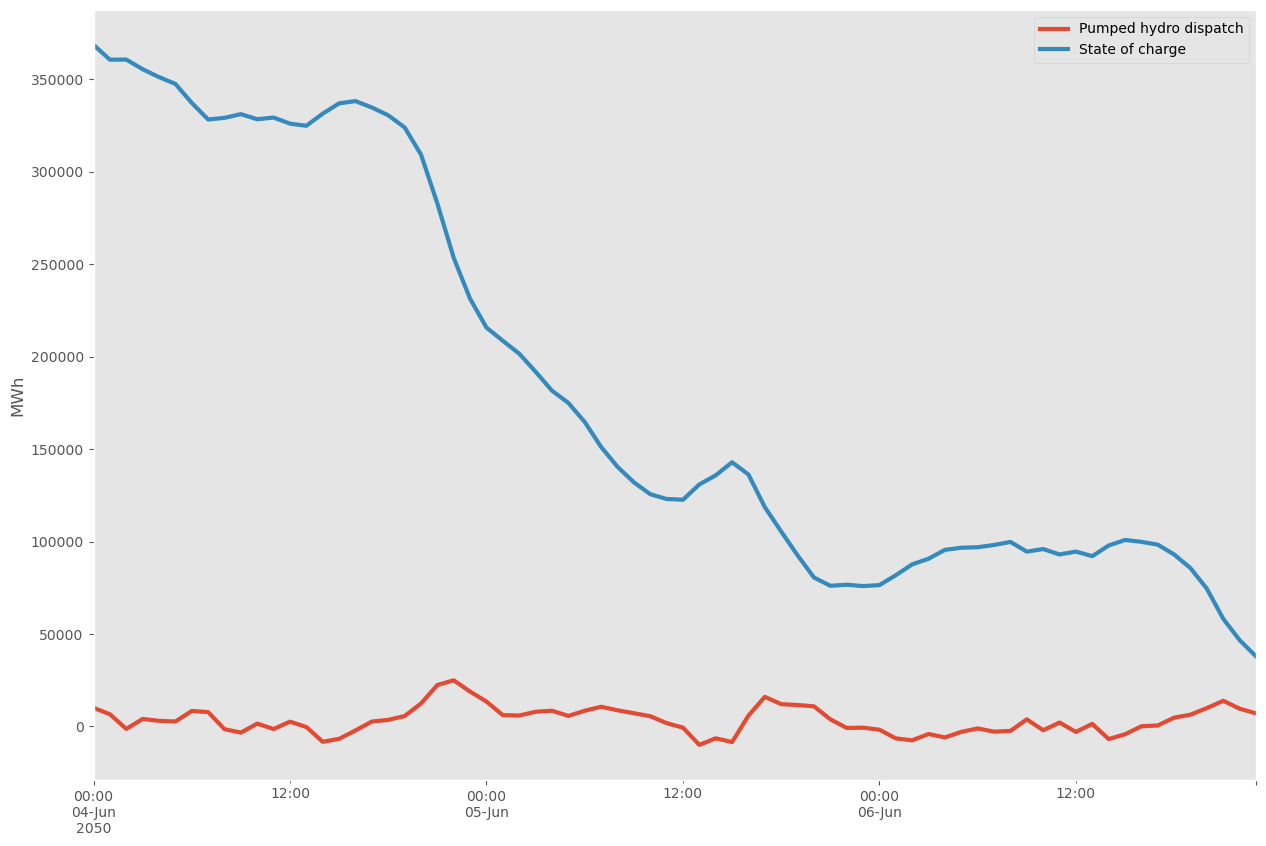

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## Plotting curtailment

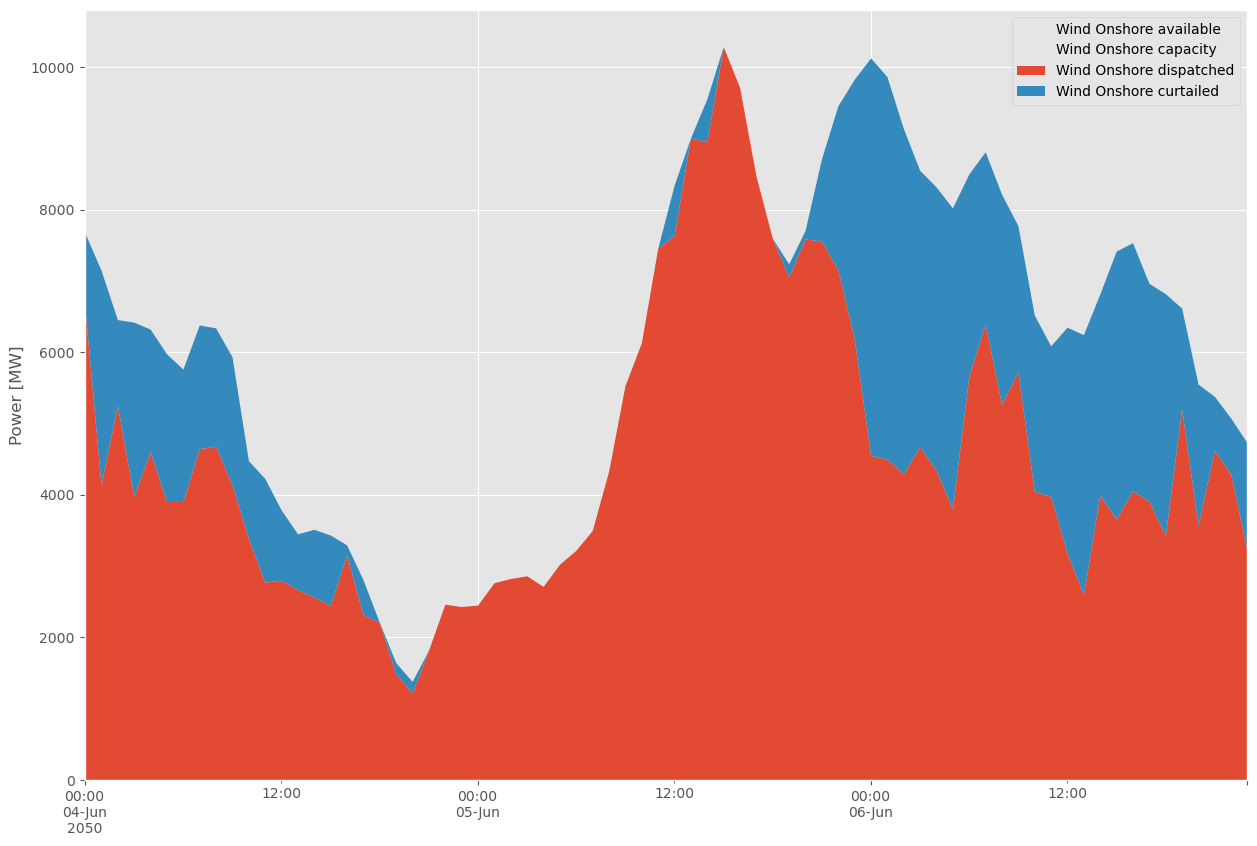

In [24]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()